# seaborn概述

> 一图胜千言

Matplotlib是Python绘图最有名的绘图工具，也是相当底层的绘图库。使用几行代码就可以快速生成散点图、直方图、饼图等简单图形。要创建复杂、美观的图形，Matplotlib的代码量就会快速增加，变得冗长。

Seaborn是在matplotlib基础上开发的高级绘图工具，目的就是让复杂图形也变得简单起来。

Seaborn是matplotlib的高级封装，集成Numpy和Pandas的数据结构，同时结合Scipy和Statsmodels的统计结果。Seaborn的初心是 在数据探索中，快速对数据集及其统计结果进行可视化，方便更好地理解数据。Seaborn的主要功能包括：
- 面向数据集的API，用于探索多变量关系
- 特别支持分类数据，显示描述性或汇总统计结果
- 单变量或双变量分布可视化以及比较
- 线性回归和可视化
- 绘制统计时间序列数据
- 复杂数据集整体结构快捷查看
- 网格绘图高级抽象
- 内置主题用于美化Matplotlib外观
- 丰富的调色板工具，优化数据显示

## 安装seaborn

使用pip安装：
```
pip install seaborn
```

或使用conda安装：
```
conda install seaborn
```

检查安装情况：

In [1]:
import seaborn as sns

print(sns.__version__)

0.9.0


## 快速入门

下面通过一个简单示例来演示seaborn的使用。首先需要导入seaborn包：

In [2]:
import seaborn as sns

设置seaborn内置主题，默认主题是`darkgrid`：

In [3]:
sns.set()

加载seaborn内置的小费数据集(`tips`)，是一个关于餐厅小费的数据集，包含7列数据：
- 总费用（total_bill）
- 付小费的金额（tip）
- 付款者性别（sex）
- 是否吸烟（smoker）
- 日期（day）
- 日间（time）
- 顾客人数（size）

通过数据分析和建模，可帮助服务员预测来餐厅就餐的顾客是否会会支付小费。

In [4]:
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


快速查看数据集，获取大概印象：

In [5]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
83,32.68,5.00,Male,Yes,Thur,Lunch,2
20,17.92,4.08,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
15,21.58,3.92,Male,No,Sun,Dinner,2


下面对总费用（total_bill）与小费两个变量之间的统计关系进行可视化：

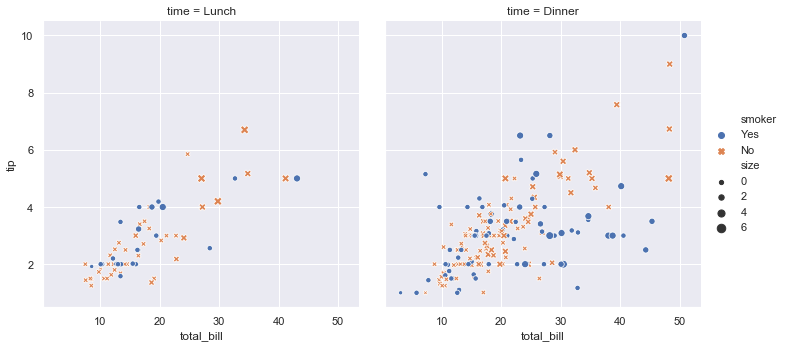

In [6]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips)

使用`relplot()`快捷地可视化多个变量之间的关系。
- 根据日间（time）变量，分别绘制两列总费用（total_bill）与小费关系图。
- 在总费用（total_bill）与小费关系图中，又用每个点的形状与大小，显示了是否吸烟（smoker）、顾客人数（size）变量的关系。

如果使用matplotlib库，则需要对数据进行多次分组与拆分和绘图操作。使用`seaborn.relplot()`函数，一次调用就能完成这些复杂操作。

## 简单示例

实例统计估计和误差棒

通常我们对一个变量的平均值感兴趣，作为其他变量的函数。许多seaborn函数可以自动执行必要的统计估计来回答这些问题：

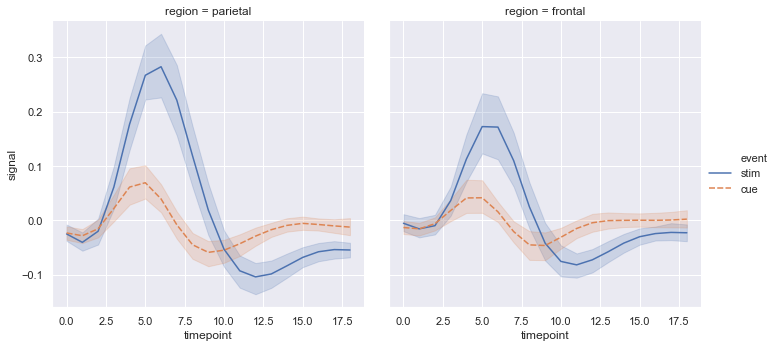

In [7]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event",
            kind="line", data=fmri);

当估计统计值时，seaborn将使用bootstraping来计算置信区间并绘制表示估计不确定性的误差。

我们还可以用`implot`函数绘制散点图，并对其进行拟合和绘制回归线

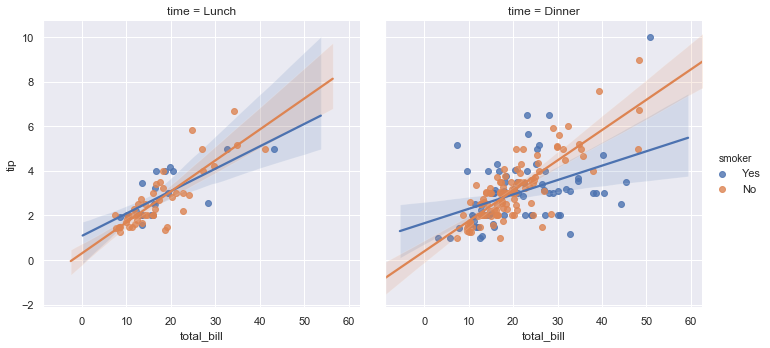

In [8]:
sns.lmplot(x="total_bill", y="tip", col="time", hue="smoker",
           data=tips);